In [170]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [171]:
dataset = pd.read_csv('data_for_lr.csv')

In [172]:
dataset

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [173]:
dataset.isnull().sum()

x    0
y    1
dtype: int64

In [174]:
dataset[dataset['y'].isnull()]

,x,y
213,3530.157369,NaN


In [175]:
dataset = dataset.dropna()

In [176]:
dataset.isnull().sum()

x    0
y    0
dtype: int64

In [177]:
dataset.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


Splitting Data

In [178]:
train_input = np.array(dataset.x[0:500]).reshape(500,1)
train_output = np.array(dataset.y[0:500]).reshape(500,1)

test_input = np.array(dataset.x[500:700]).reshape(199,1)
test_output = np.array(dataset.y[500:700]).reshape(199,1)


Forward Propagation:
f(x) or y = m.x + c

In [179]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']

    predictions = np.multiply(m, train_input) + c
    return predictions

Cost Function :       summation( 1/2 * (f(x) - y)^2 )

In [180]:
def cost_function(predictions, train_output):
    cost = np.mean((predictions - train_output) ** 2) * 0.5

    return cost

Gradient Descent for Backpropagation :
    

In [181]:
def backward_propagation(train_input, train_output, predictions):

    derivatives = dict()
    dm = np.mean(np.multiply(train_input,(predictions - train_output)))
    dc = np.mean(predictions - train_output)
    derivatives['dm'] = dm
    derivatives['dc'] = dc

    return derivatives

Updating Parameter :

In [182]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters["m"] = parameters["m"]  - learning_rate * derivatives['dm']
    parameters["c"] = parameters["c"]  - learning_rate * derivatives['dc']

    return parameters

In [183]:
def train(train_input, train_output, learning_rate, iters):
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)

    plt.figure()
    loss = list()

    for i in range(iters):
        predictions =  forward_propagation(train_input, parameters)
        cost = cost_function(predictions, train_output)
        derivatives = backward_propagation(train_input, train_output, predictions)
        parameters = update_parameters(parameters,derivatives,learning_rate)
        loss.append(cost)
        print("Iteration: " + str(i+1) + ", Loss :" + str(cost))
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, "+", label = "Original")
        ax.plot(train_input, predictions, "*", label = "Training")
        legend = ax.legend()
        plt.show()

    return parameters, loss


Iteration: 1, Loss :882.6660383094973


<Figure size 640x480 with 0 Axes>

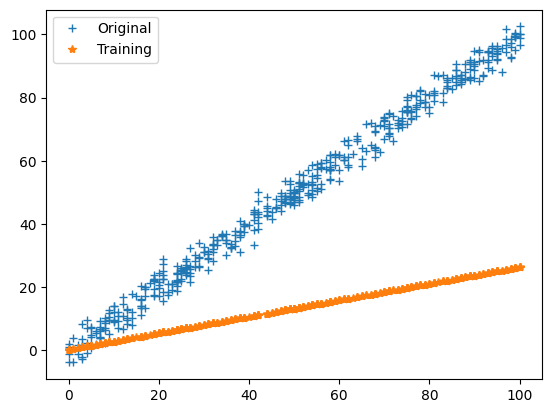

Iteration: 2, Loss :402.6150857347551


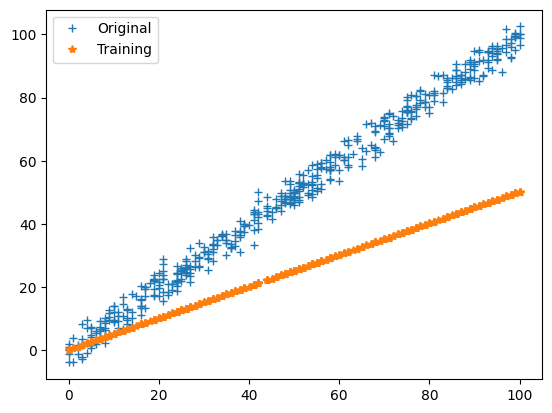

Iteration: 3, Loss :184.81543620773382


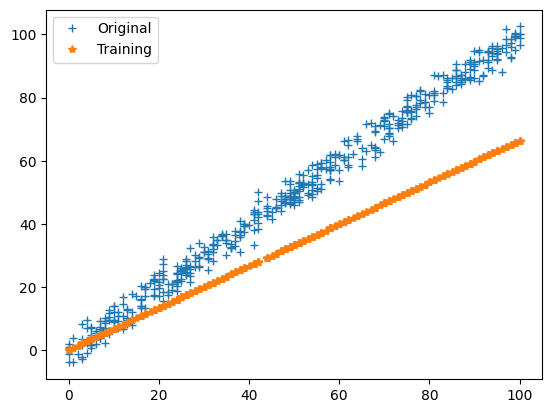

Iteration: 4, Loss :85.99949335384636


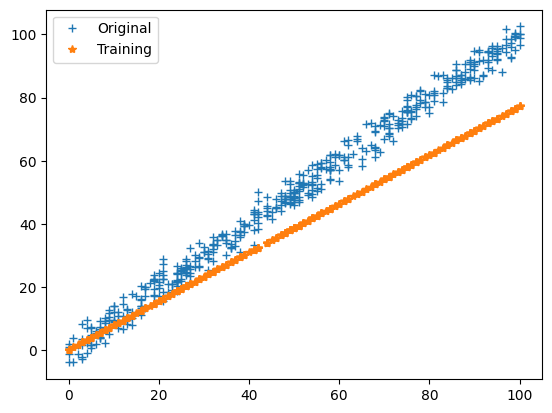

Iteration: 5, Loss :41.16659000884841


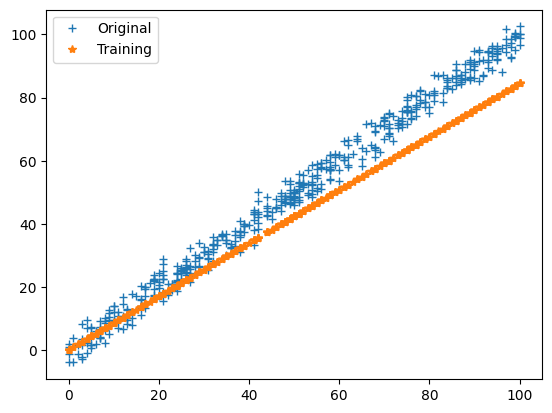

Iteration: 6, Loss :20.825851482904167


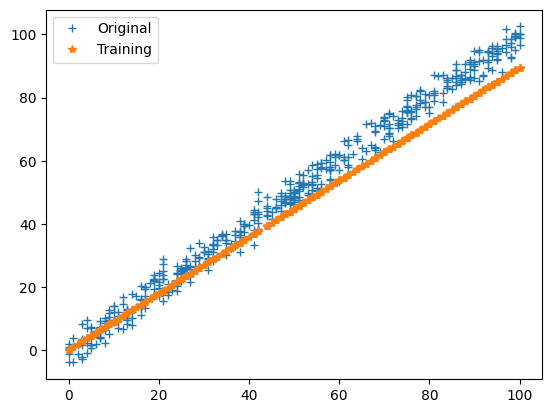

Iteration: 7, Loss :11.597235263927004


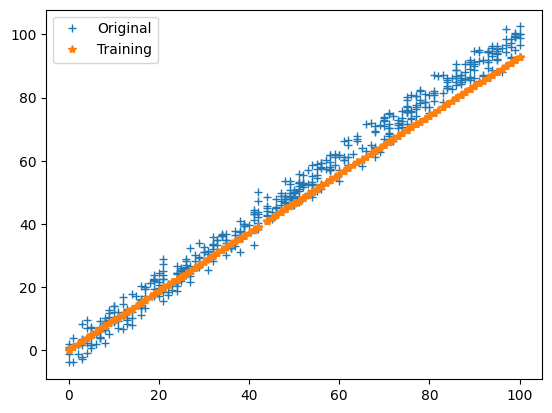

Iteration: 8, Loss :7.41020124389669


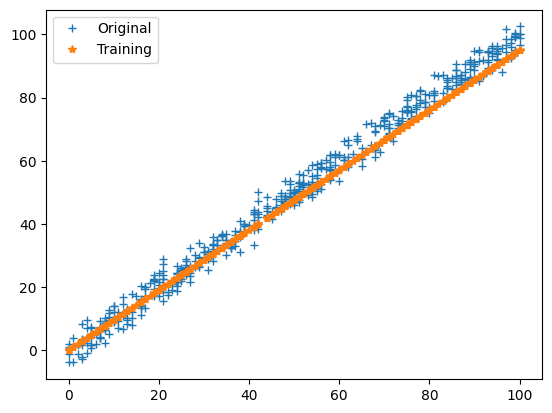

Iteration: 9, Loss :5.510538651823947


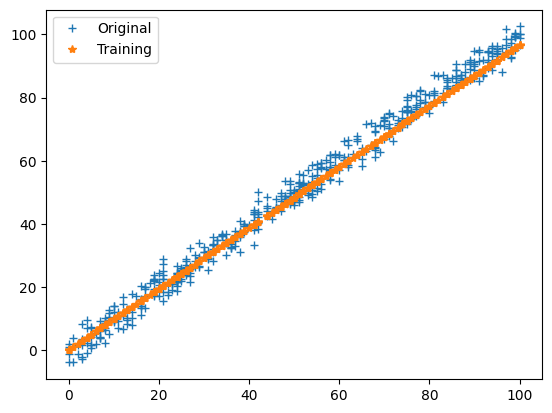

Iteration: 10, Loss :4.648659010233654


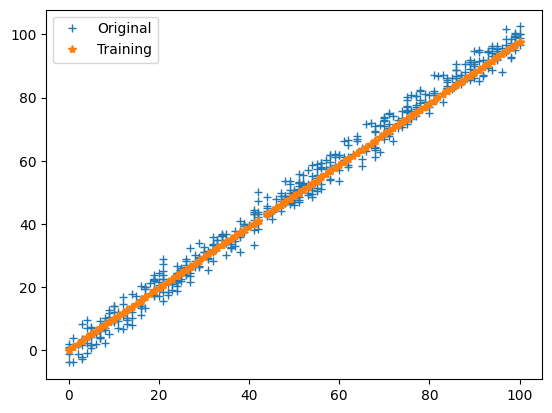

Iteration: 11, Loss :4.25762264279961


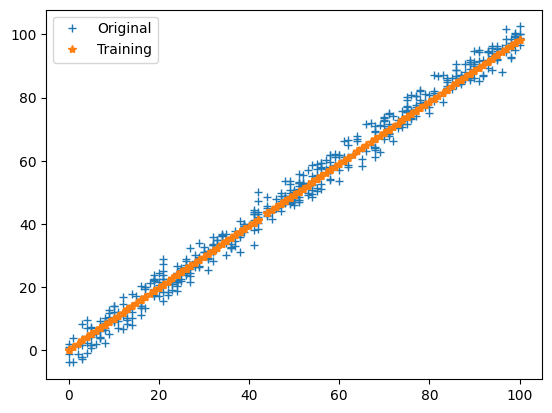

Iteration: 12, Loss :4.080208390406868


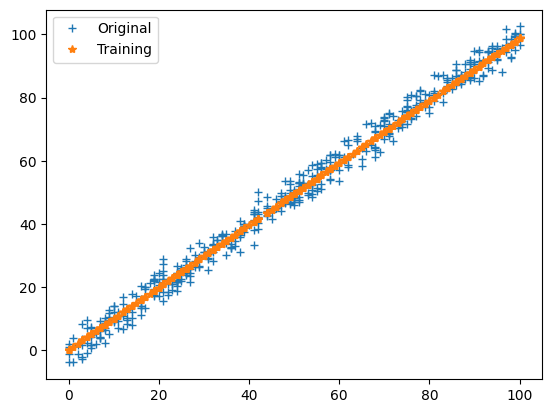

Iteration: 13, Loss :3.999714728256228


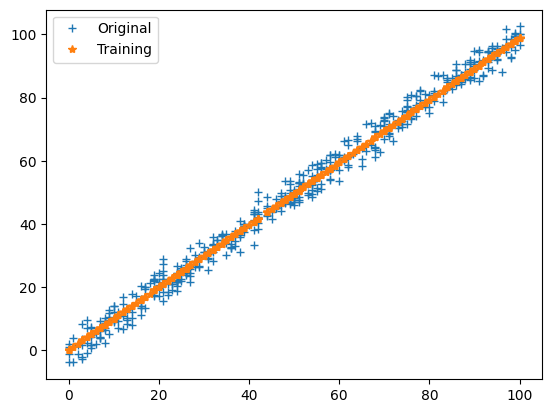

Iteration: 14, Loss :3.9631940452828656


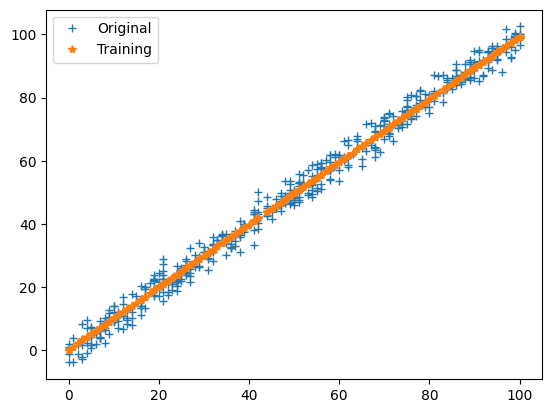

Iteration: 15, Loss :3.9466239516997157


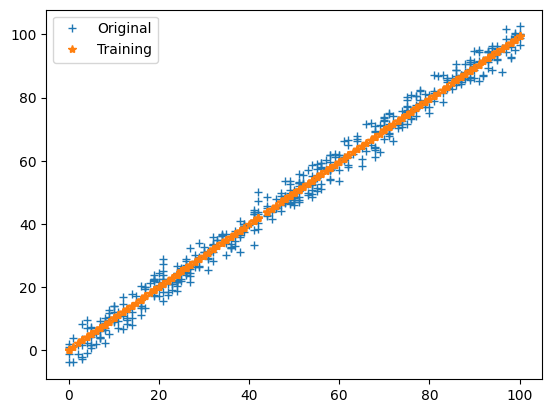

Iteration: 16, Loss :3.9391054626521935


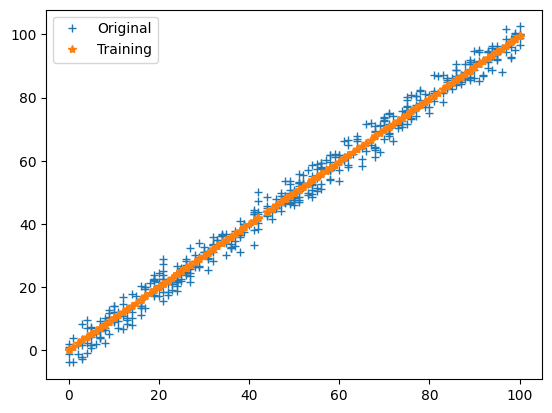

Iteration: 17, Loss :3.9356936966396097


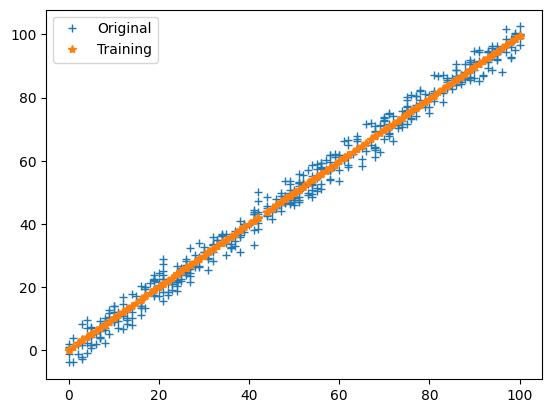

Iteration: 18, Loss :3.9341451554479443


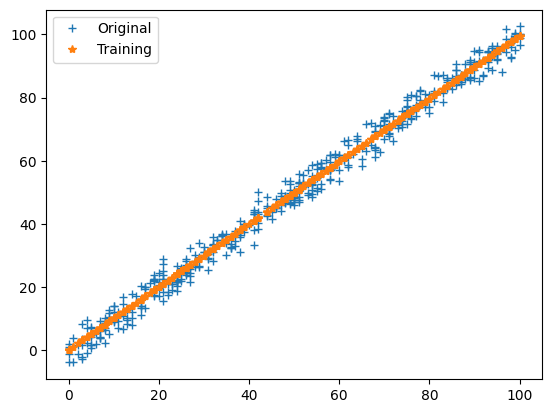

Iteration: 19, Loss :3.933441961452503


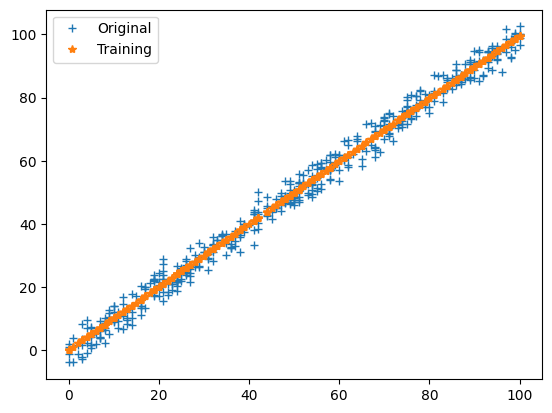

Iteration: 20, Loss :3.9331223024475195


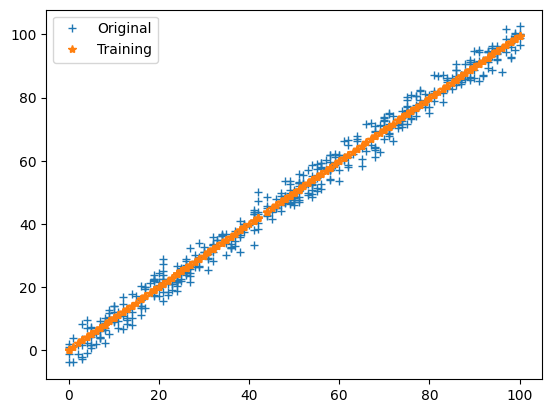

In [184]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [185]:
parameters

{'m': np.float64(0.9943294000178905), 'c': np.float64(0.18656472048962353)}

In [186]:
loss

[np.float64(882.6660383094973),
 np.float64(402.6150857347551),
 np.float64(184.81543620773382),
 np.float64(85.99949335384636),
 np.float64(41.16659000884841),
 np.float64(20.825851482904167),
 np.float64(11.597235263927004),
 np.float64(7.41020124389669),
 np.float64(5.510538651823947),
 np.float64(4.648659010233654),
 np.float64(4.25762264279961),
 np.float64(4.080208390406868),
 np.float64(3.999714728256228),
 np.float64(3.9631940452828656),
 np.float64(3.9466239516997157),
 np.float64(3.9391054626521935),
 np.float64(3.9356936966396097),
 np.float64(3.9341451554479443),
 np.float64(3.933441961452503),
 np.float64(3.9331223024475195)]

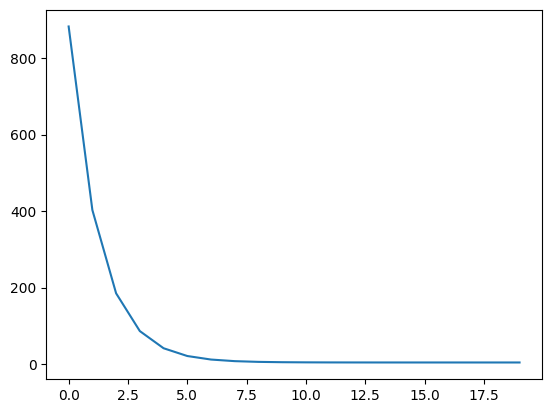

In [187]:
plt.plot(loss)

Predict

In [188]:
test_predictions = parameters['m'] * test_input + parameters['c']

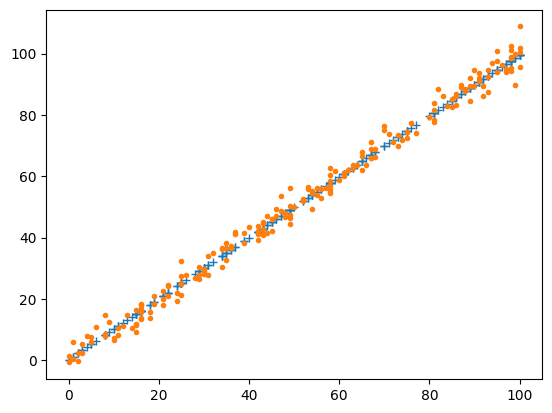

In [189]:
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output, ".")
plt.show()

SCIKIT LEARN

In [190]:
from sklearn.linear_model import LinearRegression

In [191]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [192]:
lr_model = LinearRegression()

In [193]:
lr_model.fit(train_input,train_output)

LinearRegression()

In [194]:
test_predictions = lr_model.predict(test_input)

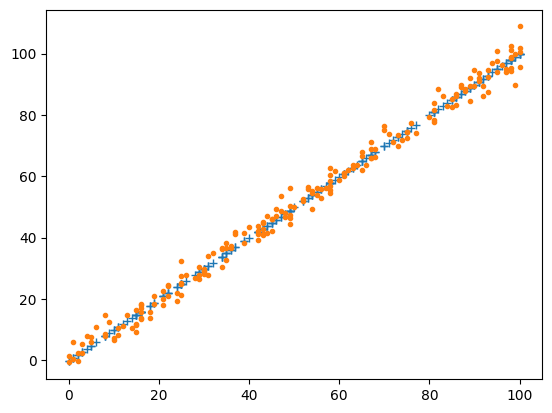

In [195]:
plt.plot(test_input, test_predictions, '+')
plt.plot(test_input, test_output, '.')
plt.show()